In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw

In [2]:
users = pd.read_csv('BeerAdvocate/users.csv')
beers = pd.read_csv('BeerAdvocate/beers.csv')
breweries = pd.read_csv('BeerAdvocate/breweries.csv')

### Users

Possible ideas for inferred attributes:
- Based on number of reviews - hard core, one time, ...
- How far is your rating from the average rating of the given beer
- Is the sentiment of what you write aligned with the score you give?

In [11]:
!head -100 BeerAdvocate/ratings.txt

beer_name: Régab
beer_id: 142544
brewery_name: Societe des Brasseries du Gabon (SOBRAGA)
brewery_id: 37262
style: Euro Pale Lager
abv: 4.5
date: 1440064800
user_name: nmann08
user_id: nmann08.184925
appearance: 3.25
aroma: 2.75
palate: 3.25
taste: 2.75
overall: 3.0
rating: 2.88
text: From a bottle, pours a piss yellow color with a fizzy white head.  This is carbonated similar to soda.The nose is basic.. malt, corn, a little floral, some earthy straw.  The flavor is boring, not offensive, just boring.  Tastes a little like corn and grain.  Hard to write a review on something so simple.Its ok, could be way worse.
review: True

beer_name: Barelegs Brew
beer_id: 19590
brewery_name: Strangford Lough Brewing Company Ltd
brewery_id: 10093
style: English Pale Ale
abv: 4.5
date: 1235127600
user_name: StJamesGate
user_id: stjamesgate.163714
appearance: 3.0
aroma: 3.5
palate: 3.5
taste: 4.0
overall: 3.5
rating: 3.67
text: Pours pale copper with a thin head that quickly goes. Caramel, golden syrup

In [4]:
list(users.columns)

['nbr_ratings', 'nbr_reviews', 'user_id', 'user_name', 'joined', 'location']

In [41]:
location_user_count = (
    users
    .groupby('location')[['user_id']]
    .count()
    .rename(columns={'user_id': 'count'})
    .sort_values('count', ascending=False)
)
total_user_count = users.shape[0]
location_user_count['% of total'] = round(100*(location_user_count['count'] / total_user_count),2)
location_user_count.iloc[:20]

,count,% of total
location,,
"United States, California",11638,7.57
"United States, Pennsylvania",8689,5.65
"United States, New York",7432,4.84
"United States, Illinois",6866,4.47
"United States, Massachusetts",6658,4.33
"United States, Texas",5893,3.83
"United States, Ohio",4776,3.11
"United States, Florida",4604,3.00
"United States, Michigan",4213,2.74


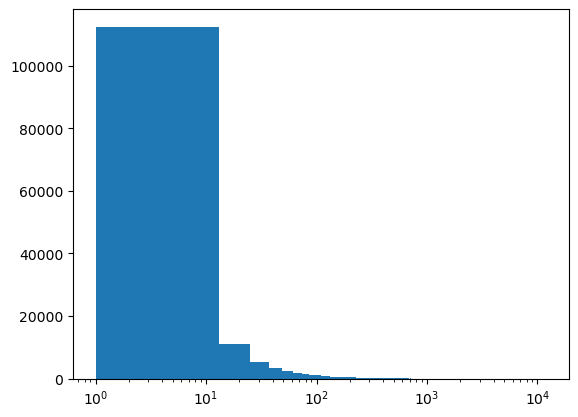

In [9]:
fig, ax = plt.subplots()
ax.hist(users[['nbr_ratings']], bins=1000)
ax.set_xscale("log")

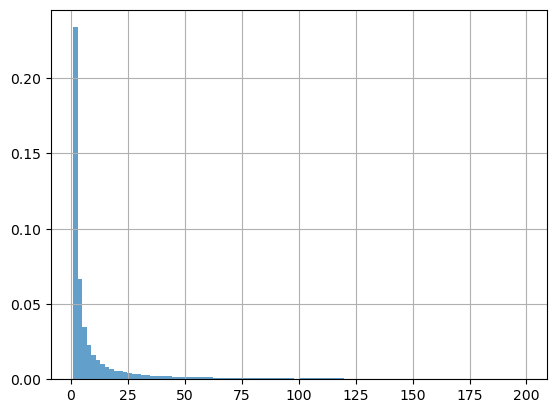

In [7]:
users[users['nbr_ratings'] < 200]['nbr_ratings'].hist(bins=100, density=True, alpha=0.7);

Values less than or equal to 0 in data. Throwing out 0 or negative values


(-904.3511513879417, 0.0)

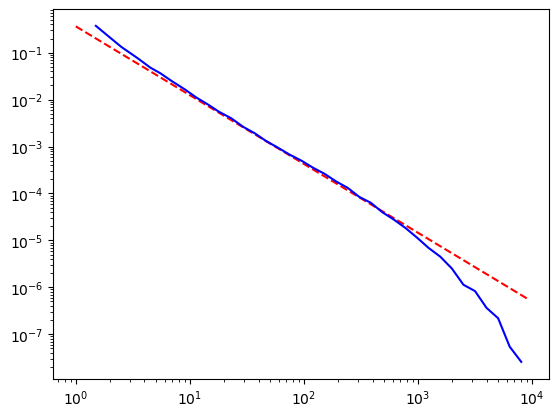

In [25]:
data = users['nbr_reviews']
fit = powerlaw.Fit(data, xmin=1, discrete=True)
fig, ax = plt.subplots()
fit.power_law.plot_pdf(color= 'r',linestyle='--', ax=ax)
fit.plot_pdf(color='b', ax=ax);
fit.distribution_compare('power_law', 'stretched_exponential')

### Breweries

In [43]:
list(breweries.columns)

['id', 'location', 'name', 'nbr_beers']

In [44]:
location_brew_count = (
    breweries
    .groupby('location')[['id']]
    .count()
    .rename(columns={'id': 'count'})
    .sort_values('count', ascending=False)
)
total_brew_count = breweries.shape[0]
location_brew_count['% of total'] = round(100*(location_brew_count['count'] / total_brew_count),2)
location_brew_count.iloc[:20]

,count,% of total
location,,
Germany,1431,8.54
England,997,5.95
"United States, California",929,5.54
Canada,775,4.62
"United States, Washington",411,2.45
"United States, New York",406,2.42
"United States, Colorado",404,2.41
France,402,2.40
Australia,401,2.39


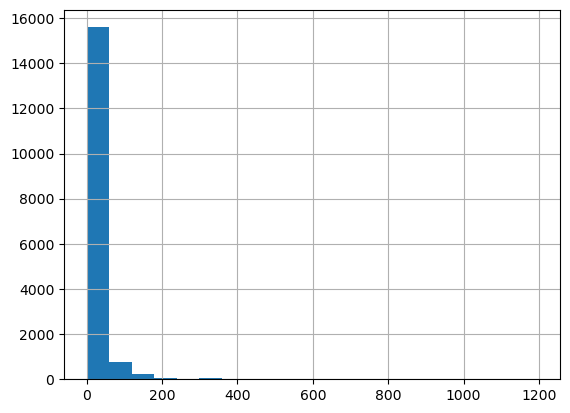

In [46]:
fig, ax = plt.subplots()
breweries['nbr_beers'].hist(ax=ax, bins=20);

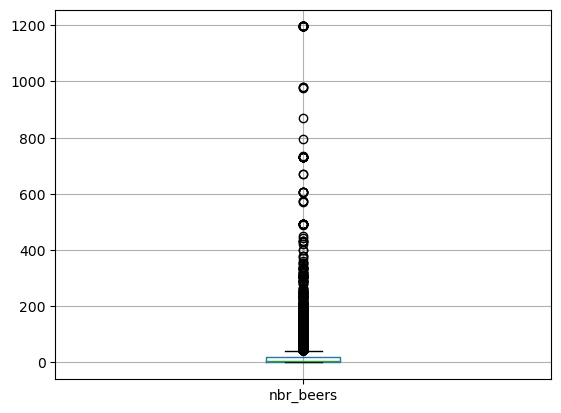

In [51]:
fig, ax = plt.subplots()
breweries.boxplot('nbr_beers', ax=ax);

In [57]:
(
    breweries
    .drop_duplicates(subset=['name'])
    .sort_values('nbr_beers', ascending=False)
    .iloc[50:100]
)

,id,location,name,nbr_beers
172,16315,Scotland,BrewDog,330
9504,28609,"United States, Massachusetts",Night Shift Brewing,323
10595,345,"United States, Pennsylvania",Victory Brewing Company - Downingtown,317
9500,14,"United States, Massachusetts",Cambridge Brewing Company,317
10597,43271,"United States, Pennsylvania",Victory Brewing Company - Parkesburg,317
10596,40257,"United States, Pennsylvania",Victory Brewing Company - Kennett Square,317
13082,287,"United States, Michigan","Bell's Brewery, Inc.",312
10569,1114,"United States, Pennsylvania",Bullfrog Brewery,312
13342,2391,"United States, Oregon",Cascade Brewing / Raccoon Lodge & Brewpub,309
8420,3835,"United States, California",Drake's Brewing Co.,308


### Beers

In [64]:
list(beers.columns)

['beer_id',
 'beer_name',
 'brewery_id',
 'brewery_name',
 'style',
 'nbr_ratings',
 'nbr_reviews',
 'avg',
 'ba_score',
 'bros_score',
 'abv',
 'avg_computed',
 'zscore',
 'nbr_matched_valid_ratings',
 'avg_matched_valid_ratings']

In [79]:
total_beer_nrev = beers['nbr_reviews'].sum()
beers['% of total'] = round(100*(beers['nbr_reviews'] / total_beer_nrev),4)
beers.sort_values('% of total', ascending=False)[['brewery_name', 'beer_name', '% of total']].iloc[:10]

,brewery_name,beer_name,% of total
180458,Dogfish Head Brewings & Eats,90 Minute IPA,0.1506
226278,Founders Brewing Company,Founders Breakfast Stout,0.1472
77815,North Coast Brewing Co.,Old Rasputin Russian Imperial Stout,0.1437
79091,Russian River Brewing Company,Pliny The Elder,0.1425
225955,"Bell's Brewery, Inc.",Two Hearted Ale,0.1375
225867,"Bell's Brewery, Inc.",Hopslam Ale,0.1362
82585,Sierra Nevada Brewing Co.,Sierra Nevada Celebration Ale,0.1338
226360,Founders Brewing Company,Founders KBS (Kentucky Breakfast Stout),0.1244
97619,Stone Brewing,Stone Ruination IPA,0.1187
76313,Arrogant Brewing,Arrogant Bastard Ale,0.1184


In [80]:
beers.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,% of total
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN,0.0
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN,0.0
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN,0.0
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN,0.0
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN,0.0
